In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option("display.max_rows", 20)
df = pd.read_csv("../input/cwurData.csv")
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [3]:
df[df["country"] == "Estonia"]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
755,556,University of Tartu,Estonia,1,353,478,210,600,388,406,496.0,259,44.94,2014
1736,537,University of Tartu,Estonia,1,365,567,218,586,318,368,457.0,426,44.68,2015


In [4]:
df.groupby("country")["quality_of_education"].mean()

country
Argentina               302.428571
Australia               287.120690
Austria                 331.458333
Belgium                 247.700000
Brazil                  348.250000
Bulgaria                244.000000
Canada                  287.041667
Chile                   323.875000
China                   346.461078
Colombia                361.000000
                           ...    
Sweden                  225.375000
Switzerland             132.538462
Taiwan                  332.782609
Thailand                361.000000
Turkey                  350.300000
USA                     218.476440
Uganda                  361.000000
United Arab Emirates    361.000000
United Kingdom          235.618056
Uruguay                 361.000000
Name: quality_of_education, Length: 59, dtype: float64

In [5]:
df2= pd.DataFrame(df.groupby("country")["quality_of_education"].mean())
df2.sort_values("quality_of_education", ascending = False)

,quality_of_education
country,
Uruguay,361.000000
Croatia,361.000000
Malaysia,361.000000
Saudi Arabia,361.000000
Slovak Republic,361.000000
Iceland,361.000000
Slovenia,361.000000
Thailand,361.000000
Cyprus,361.000000


In [6]:
df3 = df[df["year"] == 2015]
df3.country.value_counts()

USA                     229
China                    83
Japan                    74
United Kingdom           65
Germany                  55
France                   49
Italy                    47
Spain                    40
South Korea              36
Canada                   33
                       ... 
Uganda                    1
Iceland                   1
United Arab Emirates      1
Estonia                   1
Bulgaria                  1
Croatia                   1
Serbia                    1
Puerto Rico               1
Cyprus                    1
Lithuania                 1
Name: country, Length: 59, dtype: int64

Näitab palju keskmiselt patente ülikoolidel on kohtade järgi.

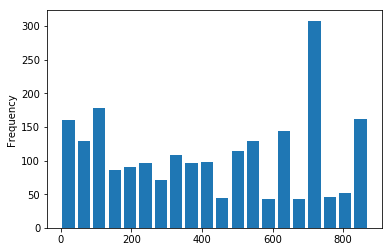

In [9]:
df.patents.plot.hist(bins=20, grid=False, rwidth=0.80);

Näitab, kuidas ülikoolide skoori ja publikatsioonide suhe on, ehk kas paremad ülikoolid väljastavad rohkem artikleid.

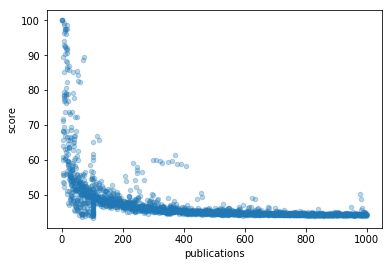

In [10]:
df.plot.scatter("publications", "score", alpha=0.3);